# Traffic Sign Classification Using Deep Learning


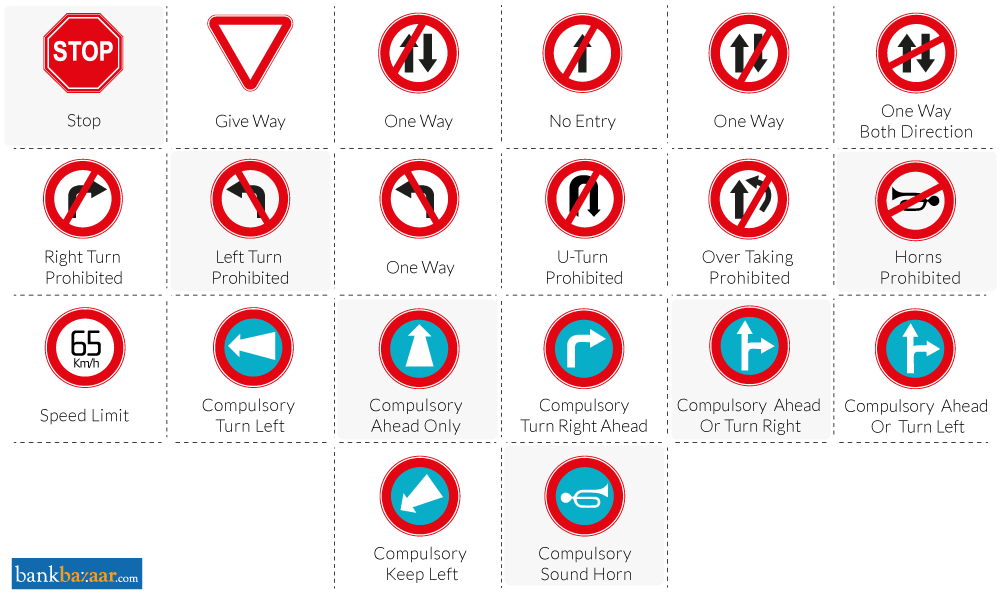

# Introduction 

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


# IMPORT LIBRARIES/DATASETS

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
with open("/content/drive/My Drive/data_traffic (1)/train.p", mode='rb') as training_data :
    train = pickle.load(training_data)
with open("/content/drive/My Drive/data_traffic (1)/valid.p", mode='rb') as validation_data :
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/data_traffic (1)/test.p", mode='rb') as testing_data :
    test = pickle.load(testing_data)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
X_train,y_train = train['features'],train['labels']
X_valid,y_valid = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

# PERFORM IMAGES VISUALIZATION

5

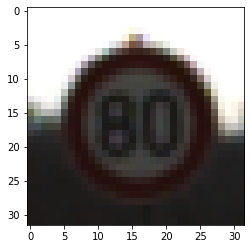

In [9]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

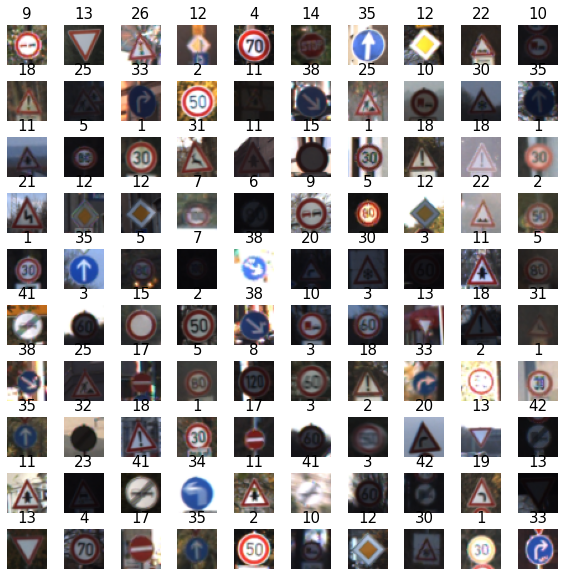

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 10 x 10 matrix into 50 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index= np.random.randint(0,n_training)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)    


        

#  CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray= np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray= np.sum(X_test/3,axis=3,keepdims=True)
X_valid_gray= np.sum(X_valid/3,axis=3,keepdims=True)

In [13]:
X_train_gray.shape

(34799, 32, 32, 1)

In [14]:
X_train_norm = (X_train_gray-128)/128
X_test_norm = (X_test_gray-128)/128
X_valid_norm = (X_valid_gray-128)/128

In [15]:
X_train_norm

array([[[[-0.5234375 ],
         [-0.52604167],
         [-0.48697917],
         ...,
         [-0.4765625 ],
         [-0.48697917],
         [-0.4921875 ]],

        [[-0.5234375 ],
         [-0.53125   ],
         [-0.48177083],
         ...,
         [-0.5       ],
         [-0.51041667],
         [-0.50260417]],

        [[-0.4921875 ],
         [-0.51041667],
         [-0.453125  ],
         ...,
         [-0.4921875 ],
         [-0.48177083],
         [-0.4765625 ]],

        ...,

        [[-0.42447917],
         [-0.50260417],
         [-0.5546875 ],
         ...,
         [-0.515625  ],
         [-0.53385417],
         [-0.55208333]],

        [[-0.4296875 ],
         [-0.4765625 ],
         [-0.52604167],
         ...,
         [-0.48177083],
         [-0.51041667],
         [-0.54166667]],

        [[-0.4375    ],
         [-0.44270833],
         [-0.515625  ],
         ...,
         [-0.45572917],
         [-0.484375  ],
         [-0.55208333]]],


       [[[-0.44791667],


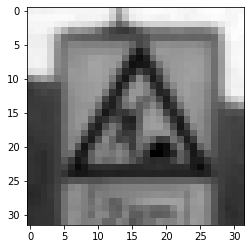

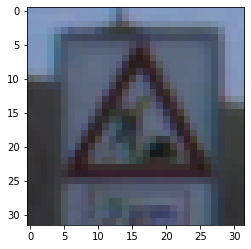

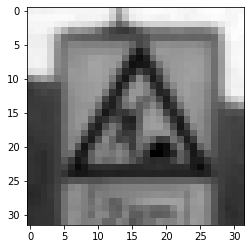

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray')

# BUILDING DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [42]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.MaxPooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))

CNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)              

# COMPILE AND TRAIN DEEP CNN MODEL

In [43]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history= CNN.fit(X_train_norm,
        y_train ,
        batch_size=500,
        epochs=40,
        verbose=1,
        validation_data=(X_valid_norm,y_valid))

Epoch 1/40
70/70 [==============================] - 1s 14ms/step - loss: 3.2275 - accuracy: 0.1623 - val_loss: 2.6816 - val_accuracy: 0.2989
Epoch 2/40
70/70 [==============================] - 1s 11ms/step - loss: 1.7784 - accuracy: 0.5090 - val_loss: 1.4462 - val_accuracy: 0.5628
Epoch 3/40
70/70 [==============================] - 1s 10ms/step - loss: 1.0632 - accuracy: 0.6902 - val_loss: 1.0258 - val_accuracy: 0.7136
Epoch 4/40
70/70 [==============================] - 1s 10ms/step - loss: 0.7800 - accuracy: 0.7776 - val_loss: 0.8257 - val_accuracy: 0.7791
Epoch 5/40
70/70 [==============================] - 1s 10ms/step - loss: 0.6269 - accuracy: 0.8233 - val_loss: 0.7581 - val_accuracy: 0.8152
Epoch 6/40
70/70 [==============================] - 1s 10ms/step - loss: 0.5171 - accuracy: 0.8582 - val_loss: 0.6521 - val_accuracy: 0.8426
Epoch 7/40
70/70 [==============================] - 1s 10ms/step - loss: 0.4538 - accuracy: 0.8736 - val_loss: 0.6088 - val_accuracy: 0.8558
Epoch 8/40
70

# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [45]:
score = CNN.evaluate(X_test_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.6492 - accuracy: 0.8970
Test Accuracy: 0.8969913125038147


In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training Loss V/S Validation Loss')

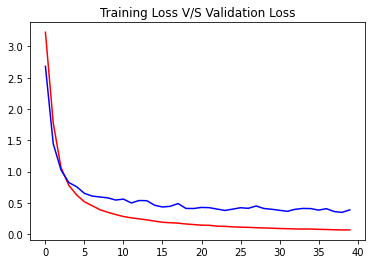

In [48]:
epochs= range(len(accuracy))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training Loss V/S Validation Loss' )

Text(0.5, 1.0, 'Training accuracy V/S Validation accuracy')

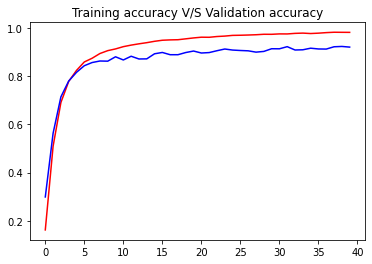

In [49]:
epochs= range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training accuracy V/S Validation accuracy')

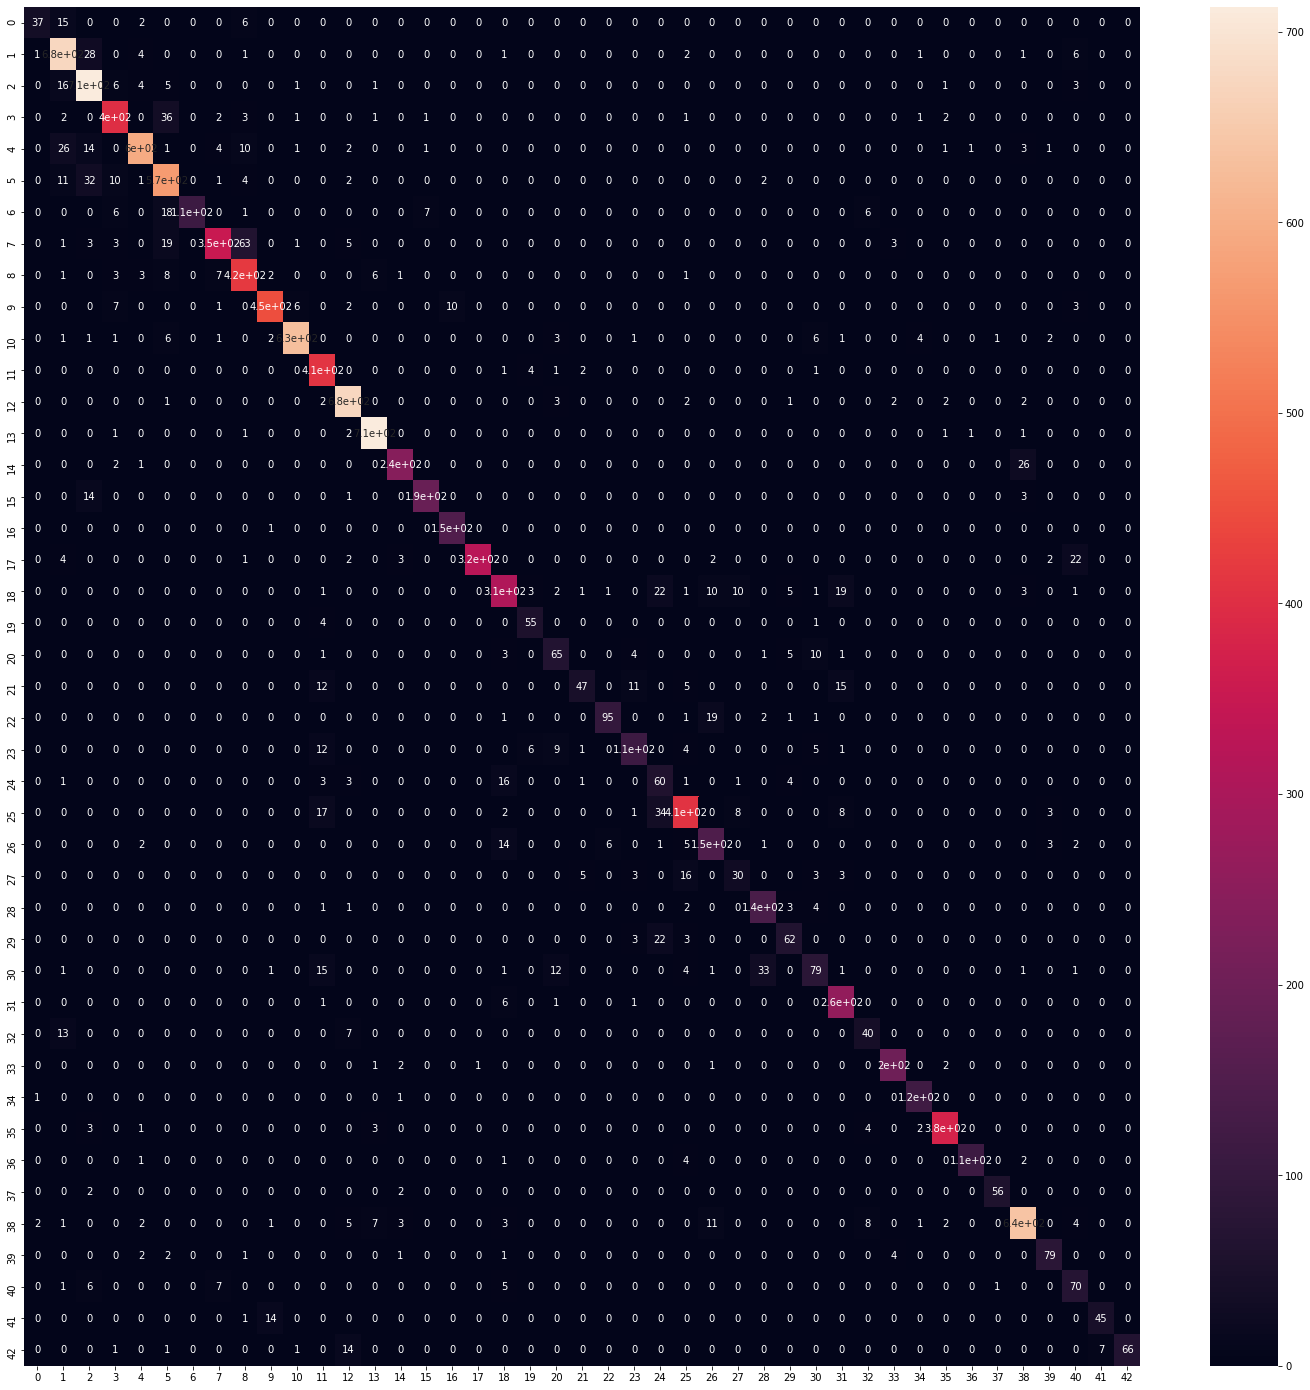

In [50]:
predicted_classes = CNN.predict_classes(X_test_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

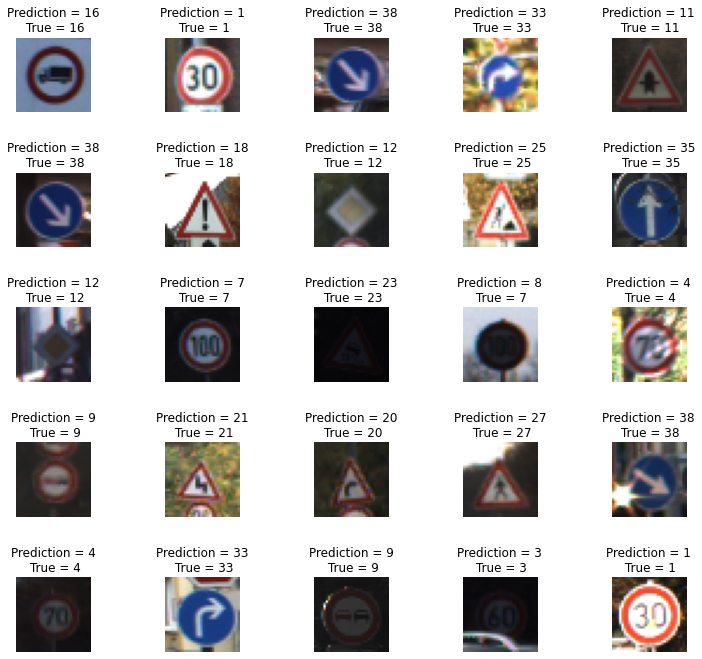

In [51]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    